In [1]:
# %load_ext autoreload
# %autoreload 2

# Set Trial Name

In [2]:
TRIAL_NAME = "21_add_gotosan2_new_feature"

import datetime
import pytz
NOW = datetime.datetime.now(pytz.timezone('Asia/Tokyo')).strftime('%Y%m%d%H%M%S')

# Load yaml

In [3]:
import yaml
CONFIG_DIR = '../config'
with open(f'{CONFIG_DIR}/run000.yml') as file:
    cfg = yaml.safe_load(file)

import sys
sys.path.append(cfg['SRC_DIR'])
cfg['run_name'] = TRIAL_NAME

# fix seed

In [4]:
from util import seed_everything
seed_everything(seed=33, use_torch=False)

# Make Output Folder

In [5]:
import os
OUTPUT_DIR = f'../../output/{NOW}_{TRIAL_NAME}'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load Model

In [6]:
import pandas as pd
import numpy as np

sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')
color = pd.read_csv('../../data/color.csv')
historical_person = pd.read_csv('../../data/historical_person.csv')
maker = pd.read_csv('../../data/maker.csv')
material = pd.read_csv('../../data/material.csv')
object_collection = pd.read_csv('../../data/object_collection.csv')
palette = pd.read_csv('../../data/palette.csv')
principal_maker_occupation = pd.read_csv('../../data/principal_maker_occupation.csv')
principal_maker = pd.read_csv('../../data/principal_maker.csv')
production_place = pd.read_csv('../../data/production_place.csv')
technique = pd.read_csv('../../data/technique.csv')
test = pd.read_csv('../../data/test.csv')
test[cfg['target']] = np.nan
train = pd.read_csv('../../data/train.csv')

In [7]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,95c14fb11c54281ad7e0,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [8]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,a2aabd3cc8859f4260ad,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,NaN,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,5d6a286cc3ab64c2c043,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,NaN,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


# del_non_overlapping_list

In [9]:
del_non_overlapping_list = [
    # 'object_id',
    'art_series_id',
    #'title',
    #'description',
    #'long_title',
    'principal_maker',
    'principal_or_first_maker',
    #'sub_title',
    'copyright_holder',
    #'more_title',
    'acquisition_method',
    # 'acquisition_date',
    # 'acquisition_credit_line',
    # 'dating_presenting_date',
    # 'dating_sorting_date',
    'dating_period',
    # 'dating_year_early',
    # 'dating_year_late'
]

from util import replace_non_overlap_val_to_missing
train, test = replace_non_overlap_val_to_missing(train,test,columns=del_non_overlapping_list)

In [10]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,other,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,missing,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,other,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [11]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,other,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,missing,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,other,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,missing,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


In [12]:
def del_non_overlapping(input_df: pd.DataFrame()):
    # for material
    train_oblect_id = train['object_id'].unique().tolist()
    test_oblect_id = test['object_id'].unique().tolist()

    train_value = set(input_df[input_df['object_id'].isin(train_oblect_id)]['name'].unique().tolist())
    test_value = set(input_df[input_df['object_id'].isin(test_oblect_id)]['name'].unique().tolist())

    common_value_list = list(train_value & test_value)

    return input_df[input_df['name'].isin(common_value_list)]

material = del_non_overlapping(material)
historical_person = del_non_overlapping(historical_person)
object_collection = del_non_overlapping(object_collection)
production_place = del_non_overlapping(production_place)

# Merge Data

In [13]:
group = train.groupby('principal_maker')

agg_df = pd.concat([
    group.size().rename('size'), # 著者が何回出てくるか. (value_counts と同じです)
    group['sub_title'].nunique().rename('sub_title_num'), # 著者ごとに何種類の sub_title を持っているか
    group['dating_sorting_date'].agg(['min', 'max', 'mean']), # 著者ごとに描いた年度の最小・最大・平均 (agg に配列を渡すと同時に複数やってくれます)
], axis=1)

agg_df.head()

,size,sub_title_num,min,max,mean
principal_maker,,,,,
A. Böeseken,5,5,1858.0,1873.0,1865.8
A. Lutz,1,1,1825.0,1825.0,1825.0
A. Mansuy,2,2,1860.0,1860.0,1860.0
A. Nissen,3,1,1860.0,1860.0,1860.0
A. Roussel,1,1,1905.0,1905.0,1905.0


In [14]:
train = pd.merge(train, 
         agg_df,
         on='principal_maker', 
         how='left')

test = pd.merge(test, 
         agg_df,
         on='principal_maker', 
         how='left')

In [15]:
train.columns

Index(['object_id', 'art_series_id', 'title', 'description', 'long_title',
       'principal_maker', 'principal_or_first_maker', 'sub_title',
       'copyright_holder', 'more_title', 'acquisition_method',
       'acquisition_date', 'acquisition_credit_line', 'dating_presenting_date',
       'dating_sorting_date', 'dating_period', 'dating_year_early',
       'dating_year_late', 'likes', 'size', 'sub_title_num', 'min', 'max',
       'mean'],
      dtype='object')

# Feature Enginnering

In [16]:
def create_object_feature(input_df):        
    return input_df['likes'].copy()

create_object_feature(test).head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: likes, dtype: float64

In [17]:
def create_numeric_feature(input_df):
    use_columns = [
        'dating_period',
        'dating_year_early',
        'dating_year_late'
    ]

    return input_df[use_columns].copy()

create_numeric_feature(train).head(2)

,dating_period,dating_year_early,dating_year_late
0,17,1660.0,1685.0
1,19,1900.0,1930.0


In [18]:
def create_categorical_feature(input_df):
    use_columns = [
    'art_series_id',
    'principal_maker',
    'principal_or_first_maker',
    'copyright_holder',
    'acquisition_method',
    ]

    return input_df[use_columns].copy()

create_categorical_feature(train).head(2)

,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method
0,other,Jan Hackaert,Jan Hackaert,missing,purchase
1,other,Richard Tepe,Richard Tepe,erven Richard Tepe,purchase


In [19]:
def create_maker_feature(input_df):
    # 本当は時間の処理とかすべき。
    merge_df = pd.merge(input_df['principal_maker'], maker, left_on='principal_maker', right_on='name',how='left')
    merge_df = merge_df.fillna('missing')
    return merge_df.iloc[:,2:]

create_maker_feature(train).head(2)

,place_of_birth,date_of_birth,date_of_death,place_of_death,nationality
0,Amsterdam,1628,1705,Amsterdam,missing
1,Amsterdam,1864,1952,Apeldoorn,missing


In [20]:
def create_material_feature(input_df):  
    vc = material['name'].value_counts()
    
    # 出現回数30以上に絞る
    use_names = vc[vc >= 30].index
    
    # isin で 30 回以上でてくるようなレコードに絞り込んでから crosstab を行なう
    idx = material['name'].isin(use_names)
    material_only_frequent = material[idx].reset_index(drop=True)
        
    cross_material = pd.crosstab(material_only_frequent['object_id'], material_only_frequent['name']).reset_index()
    input_cross_material = pd.merge(input_df['object_id'], cross_material, on='object_id',how='left')
    return input_cross_material.iloc[:,1:].add_prefix('Materials_')

create_material_feature(train).head(2)

,Materials_RC paper,Materials_baryta paper,Materials_canvas,Materials_cardboard,Materials_celluloid (cellulosic),Materials_copper (metal),Materials_glass,Materials_ink,Materials_leather,Materials_linen (material),Materials_metal,Materials_oil paint (paint),Materials_panel,Materials_paper,Materials_pencil,Materials_photographic paper,Materials_velvet (fabric weave),Materials_wood (plant material)
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
def create_historical_person_feature(input_df):
    vc = historical_person['name'].value_counts()
    
    # 出現回数30以上に絞る
    use_names = vc[vc >= 30].index
    
    # isin で 30 回以上でてくるようなレコードに絞り込んでから crosstab を行なう
    idx = historical_person['name'].isin(use_names)
    historical_person_only_famous = historical_person[idx].reset_index(drop=True)
    #print(historical_person_only_famous)
        
    cross_historical_person = pd.crosstab(historical_person_only_famous['object_id'], historical_person_only_famous['name']).reset_index()
    
    input_historical_person = pd.merge(input_df['object_id'], cross_historical_person, on='object_id',how='left')
    input_historical_person.columns = [col.replace(',','') for col in input_historical_person.columns]
    return input_historical_person.iloc[:,1:].add_prefix('HistoricalPerson_')
  
create_historical_person_feature(train).head(2)

,HistoricalPerson_Djatiroto Suikeronderneming,HistoricalPerson_Frederik Hendrik (prins van Oranje),HistoricalPerson_Handels Vereeniging Amsterdam,HistoricalPerson_Jacobus II (koning van Engeland en Schotland),HistoricalPerson_Lodewijk XIV (koning van Frankrijk),HistoricalPerson_Maria II Stuart (koningin van Engeland Schotland en Ierland),HistoricalPerson_Maurits (prins van Oranje),HistoricalPerson_Musschenbroek Sam van,HistoricalPerson_Oldenbarnevelt Johan van,HistoricalPerson_Ruyter Michiel Adriaansz. de,...,HistoricalPerson_Wilhelm II (keizer van Duitsland),HistoricalPerson_Wilhelmina (koningin der Nederlanden),HistoricalPerson_Willem I (prins van Oranje),HistoricalPerson_Willem III (koning der Nederlanden),HistoricalPerson_Willem III (prins van Oranje en koning van Engeland Schotland en Ierland),HistoricalPerson_Willem V (prins van Oranje-Nassau),HistoricalPerson_Wirix F.J.,HistoricalPerson_Witt Cornelis de,HistoricalPerson_Witt Johan de,HistoricalPerson_Álvarez de Toledo Fernando (3e hertog van Alva)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
def create_object_collection_feature(input_df):
    vc = object_collection['name'].value_counts()
    
    # 出現回数30以上に絞る
    use_names = vc[vc >= 0].index
    
    # isin で 30 回以上でてくるようなレコードに絞り込んでから crosstab を行なう
    idx = object_collection['name'].isin(use_names)
    object_collection_only_frequent = object_collection[idx].reset_index(drop=True)
    #print(historical_person_only_famous)
        
    cross_object_collection = pd.crosstab(object_collection_only_frequent['object_id'], object_collection_only_frequent['name']).reset_index()
    
    input_object_collection = pd.merge(input_df['object_id'], cross_object_collection, on='object_id',how='left')
    return input_object_collection.iloc[:,1:].add_prefix('ObjectCollection_')
  
create_object_collection_feature(train).head()

,ObjectCollection_Navy Model Room,ObjectCollection_dollhouse,ObjectCollection_drawings,ObjectCollection_lace,ObjectCollection_musical instruments,ObjectCollection_paintings,ObjectCollection_paper,ObjectCollection_prints
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
def create_production_place_feature(input_df):
    vc = production_place['name'].value_counts()
    
    # 出現回数30以上に絞る
    use_names = vc[vc >= 30].index
    
    # isin で 30 回以上でてくるようなレコードに絞り込んでから crosstab を行なう
    idx = production_place['name'].isin(use_names)
    production_place_only_frequent = production_place[idx].reset_index(drop=True)
    #print(historical_person_only_famous)
        
    cross_production_place = pd.crosstab(production_place_only_frequent['object_id'], production_place_only_frequent['name']).reset_index()
    
    input_production_place = pd.merge(input_df['object_id'], cross_production_place, on='object_id',how='left')
    
    input_production_place.columns = [col.replace(',','') for col in input_production_place.columns]
    return input_production_place.iloc[:,1:].add_prefix('ProductionPlace_')
  
create_production_place_feature(train).head(2)

,ProductionPlace_? France,ProductionPlace_? Java,ProductionPlace_? Netherlands,ProductionPlace_Amsterdam,ProductionPlace_Antwerp,ProductionPlace_Arnhem,ProductionPlace_Batavia,ProductionPlace_Belgium,ProductionPlace_Berlin,ProductionPlace_Brussels,...,ProductionPlace_Sumatra,ProductionPlace_Surabaya,ProductionPlace_Suriname,ProductionPlace_Switzerland,ProductionPlace_The Hague,ProductionPlace_United States of America,ProductionPlace_Utrecht,ProductionPlace_Venice,ProductionPlace_Vienna,ProductionPlace_unknown
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def create_technique_feature(input_df):
    vc = technique['name'].value_counts()
    
    # 出現回数30以上に絞る
    use_names = vc[vc >= 30].index
    
    # isin で 30 回以上でてくるようなレコードに絞り込んでから crosstab を行なう
    idx = technique['name'].isin(use_names)
    technique_only_frequent = technique[idx].reset_index(drop=True)
    #print(historical_person_only_famous)
        
    cross_technique = pd.crosstab(technique_only_frequent['object_id'], technique_only_frequent['name']).reset_index()
    
    input_technique = pd.merge(input_df['object_id'], cross_technique, on='object_id',how='left')
    return input_technique.iloc[:,1:].add_prefix('Technique_')
  
create_technique_feature(test).head()

,Technique_albumen print,Technique_ambrotype,Technique_brush,Technique_collotype,Technique_colour woodcut,Technique_cyanotype,Technique_drypoint,Technique_engraving,Technique_etching,Technique_gelatin silver print,Technique_inkjet print,Technique_letterpress printing,Technique_painting,Technique_pen,Technique_salted paper print,Technique_slide,Technique_steel engraving
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import datetime

def create_acquisition_feature(input_df):
    out_df = pd.DataFrame()
    
    use_columns = [
        'acquisition_date'
    ]
    
    out_df['year'] = pd.to_datetime(input_df['acquisition_date']).dt.year
    out_df['month'] = pd.to_datetime(input_df['acquisition_date']).dt.month
    out_df['dayofweek'] = pd.to_datetime(input_df['acquisition_date']).dt.dayofweek
    out_df['sum_time'] =  10**10 - pd.to_datetime(input_df['acquisition_date']).view('int') // 10**9
    
    return out_df.add_prefix('AcquisitionDate_')

create_acquisition_feature(train).head(2)

,AcquisitionDate_year,AcquisitionDate_month,AcquisitionDate_dayofweek,AcquisitionDate_sum_time
0,1808.0,1.0,4.0,15112288000
1,2000.0,1.0,5.0,9053315200


In [26]:
def create_string_length_feature(input_df):
    out_df = pd.DataFrame()

    str_columns = [
        'title', 
        'long_title',
        'sub_title',
        'more_title',
        'description',
        'principal_maker',
        'principal_or_first_maker'
    ]

    for c in str_columns:
        out_df[c] = input_df[c].str.len()

    return out_df.add_prefix('StringLength__')

create_string_length_feature(train).head(2)

,StringLength__title,StringLength__long_title,StringLength__sub_title,StringLength__more_title,StringLength__description,StringLength__principal_maker,StringLength__principal_or_first_maker
0,21,48,39.0,21.0,NaN,12,12
1,15,64,17.0,15.0,NaN,12,12


In [27]:
def create_count_encoding_feature(input_df):
    use_columns = [
        'acquisition_method',
        'acquisition_date',
        'acquisition_credit_line',
        'art_series_id', 
        'principal_maker',
        'principal_or_first_maker',
        'description', 
        'dating_presenting_date',
        'dating_sorting_date',
        'dating_period',
        'dating_year_early',
        'dating_year_late',
        'title',
        'long_title',
        'sub_title',
        'copyright_holder',
        'more_title',
    ]

    out_df = pd.DataFrame()
    for column in use_columns:
        vc = train[column].value_counts()
        out_df[column] = input_df[column].map(vc)

    return out_df.add_prefix('CE_')

create_count_encoding_feature(train).head(2)

,CE_acquisition_method,CE_acquisition_date,CE_acquisition_credit_line,CE_art_series_id,CE_principal_maker,CE_principal_or_first_maker,CE_description,CE_dating_presenting_date,CE_dating_sorting_date,CE_dating_period,CE_dating_year_early,CE_dating_year_late,CE_title,CE_long_title,CE_sub_title,CE_copyright_holder,CE_more_title
0,4253,48.0,NaN,12026,3,3,NaN,3.0,65.0,3005,65.0,30.0,1,1,1.0,11313,1.0
1,4253,231.0,NaN,12026,180,180,NaN,77.0,321.0,5042,321.0,214.0,1,1,1.0,180,1.0


In [28]:
def create_one_hot_encoding(input_df):
    use_columns = [
        'acquisition_method',
        'principal_maker'
    ]
    out_df = pd.DataFrame()
    for column in use_columns:

        # あまり巨大な行列にならないよう, 出現回数が 20 回を下回るカテゴリは考慮しない
        vc = train[column].value_counts()
        vc = vc[vc > 20]

        # 明示的に catgories を指定して, input_df によらず列の大きさが等しくなるようにする
        cat = pd.Categorical(input_df[column], categories=vc.index)

        # このタイミングで one-hot 化
        out_i = pd.get_dummies(cat)
        # column が Catgory 型として認識されているので list にして解除する (こうしないと concat でエラーになる)
        out_i.columns = out_i.columns.tolist()
        out_i = out_i.add_prefix(f'{column}=')
        out_df = pd.concat([out_df, out_i], axis=1)
    return out_df

create_one_hot_encoding(train).head(2)

,acquisition_method=purchase,acquisition_method=transfer,acquisition_method=gift,acquisition_method=unknown,acquisition_method=bequest,acquisition_method=loan,acquisition_method=missing,acquisition_method=nationalization 1795,principal_maker=anonymous,principal_maker=other,...,principal_maker=James Valentine,principal_maker=C.M. Ferrier & F. von Martens,principal_maker=Cor Jaring,principal_maker=Adolphe Zimmermans,principal_maker=Jan Banning,principal_maker=Jan Maurits Quinkhard,principal_maker=Wouter Johannes van Troostwijk,principal_maker=Augusta Curiel,principal_maker=Gerard Edelinck,principal_maker=Jean Baptiste August Kessler
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
import re

#  h 166mm × w 78/54mm

def get_h_from_subtitle(text:str):
    match_cm = re.search(r'h \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'h \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100

def get_w_from_subtitle(text:str):
    match_cm = re.search(r'w \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'w \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        elif match_mm.group()[2:-2] == '78/54':
            return float(78)
        else:
            return float(match_mm.group()[2:-2])/100    

def get_t_from_subtitle(text:str):
    match_cm = re.search(r't \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r't \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100   

def get_d_from_subtitle(text:str):
    match_cm = re.search(r'd \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'd \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100   
        
def create_subtitle_info(input_df):
    out_df = pd.DataFrame()
     
    out_df['subtitle_h'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_h_from_subtitle(x))
    out_df['subtitle_w'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_w_from_subtitle(x))
    out_df['subtitle_t'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_t_from_subtitle(x))
    out_df['subtitle_d'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_d_from_subtitle(x))
    
    out_df['area'] = out_df['subtitle_h'] * out_df['subtitle_w']
    out_df['volume'] = out_df['subtitle_h'] * out_df['subtitle_w'] * out_df['subtitle_t']

    return out_df

create_subtitle_info(test).head(2)

,subtitle_h,subtitle_w,subtitle_t,subtitle_d,area,volume
0,1.67,1.08,NaN,NaN,1.8036,NaN
1,29.70,24.10,NaN,NaN,715.7700,NaN


In [30]:
# # train_emb_npy = np.load('../../extract_data/train_word_emb.npy')
# # test_emb_npy = np.load('../../extract_data/test_word_emb.npy')

# train_emb_npy = np.load('../../extract_data/train_description_emb_multilingual.npy')
# test_emb_npy = np.load('../../extract_data/test_description_emb_multilingual.npy')

# train_emb_df = pd.concat([train['object_id'], pd.DataFrame(train_emb_npy)],axis=1)
# test_emb_df = pd.concat([test['object_id'], pd.DataFrame(test_emb_npy)],axis=1)

# all_df = pd.concat([train_emb_df,test_emb_df],axis=0).reset_index(drop=True)

# all_df.to_pickle('../../extract_data/all_description_emb_multilingual.pkl')

In [31]:
from util import use_pca

def create_description_emb(input_df):
    out_df = pd.DataFrame()
    
    all_emb_df = pd.read_pickle('../../extract_data/all_description_emb_multilingual.pkl')
    
#     # 756 to 256
#     comp_num = 256

#     pca = PCA(n_components = comp_num)
#     pca_res = pca.fit_transform(all_emb_df.iloc[:,1:].values)
#     emb_df_256 = pd.DataFrame(pca_res, columns=[f'pca_{i}' for i in range(comp_num)])
#     all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1

    emb_df_256 = use_pca(all_emb_df.iloc[:,1:], 256)
    all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1)
    
    input_word_emb = pd.merge(input_df['object_id'], all_emb_df_256, on='object_id', how='left')
    
    # return input_word_emb[[num for num in range(768)]].add_prefix('DescriptionEmb_')
    return input_word_emb[[f'pca_{num}' for num in range(256)]].add_prefix('DescriptionEmb_')

create_description_emb(test).tail(2)

,DescriptionEmb_pca_0,DescriptionEmb_pca_1,DescriptionEmb_pca_2,DescriptionEmb_pca_3,DescriptionEmb_pca_4,DescriptionEmb_pca_5,DescriptionEmb_pca_6,DescriptionEmb_pca_7,DescriptionEmb_pca_8,DescriptionEmb_pca_9,...,DescriptionEmb_pca_246,DescriptionEmb_pca_247,DescriptionEmb_pca_248,DescriptionEmb_pca_249,DescriptionEmb_pca_250,DescriptionEmb_pca_251,DescriptionEmb_pca_252,DescriptionEmb_pca_253,DescriptionEmb_pca_254,DescriptionEmb_pca_255
12006,4.868668,-2.158478,0.022857,0.005380,-0.005051,-0.033197,-0.030381,0.001403,-0.000757,-0.003157,...,-0.000065,-0.000070,-0.000092,0.000011,0.000046,-0.000033,0.000201,0.000043,-0.000019,-0.000100
12007,-2.857192,-0.279424,-1.757070,-0.255253,-0.783499,-0.267255,-0.262804,-0.261662,0.870814,-0.289136,...,-0.002021,-0.026324,0.001770,-0.004371,0.023271,0.019867,0.020989,0.001674,0.005685,0.004983


In [32]:
# train_emb_npy = np.load('../../extract_data/train_word_emb.npy')
# test_emb_npy = np.load('../../extract_data/test_word_emb.npy')

# train_emb_npy = np.load('../../extract_data/train_description_emb_multilingual.npy')
# test_emb_npy = np.load('../../extract_data/test_description_emb_multilingual.npy')

train_emb_npy = np.load('../../extract_data/train_long_title_emb_multilingual.npy')
test_emb_npy = np.load('../../extract_data/test_long_title_emb_multilingual.npy')

train_emb_df = pd.concat([train['object_id'], pd.DataFrame(train_emb_npy)],axis=1)
test_emb_df = pd.concat([test['object_id'], pd.DataFrame(test_emb_npy)],axis=1)

all_df = pd.concat([train_emb_df,test_emb_df],axis=0).reset_index(drop=True)

all_df.to_pickle('../../extract_data/all_longtitle_emb_multilingual.pkl')

In [33]:
from util import use_pca

def create_longtitle_emb(input_df):
    out_df = pd.DataFrame()
    
    all_emb_df = pd.read_pickle('../../extract_data/all_longtitle_emb_multilingual.pkl')
    
#     # 756 to 256
#     comp_num = 256

#     pca = PCA(n_components = comp_num)
#     pca_res = pca.fit_transform(all_emb_df.iloc[:,1:].values)
#     emb_df_256 = pd.DataFrame(pca_res, columns=[f'pca_{i}' for i in range(comp_num)])
#     all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1

    emb_df_256 = use_pca(all_emb_df.iloc[:,1:], 256)
    all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1)
    
    input_word_emb = pd.merge(input_df['object_id'], all_emb_df_256, on='object_id', how='left')
    
    # return input_word_emb[[num for num in range(768)]].add_prefix('DescriptionEmb_')
    return input_word_emb[[f'pca_{num}' for num in range(256)]].add_prefix('LongTitleEmb_')

create_longtitle_emb(train).tail(2)

,LongTitleEmb_pca_0,LongTitleEmb_pca_1,LongTitleEmb_pca_2,LongTitleEmb_pca_3,LongTitleEmb_pca_4,LongTitleEmb_pca_5,LongTitleEmb_pca_6,LongTitleEmb_pca_7,LongTitleEmb_pca_8,LongTitleEmb_pca_9,...,LongTitleEmb_pca_246,LongTitleEmb_pca_247,LongTitleEmb_pca_248,LongTitleEmb_pca_249,LongTitleEmb_pca_250,LongTitleEmb_pca_251,LongTitleEmb_pca_252,LongTitleEmb_pca_253,LongTitleEmb_pca_254,LongTitleEmb_pca_255
12024,0.134985,0.274561,-0.355268,-0.568043,0.490873,-0.759762,0.800045,0.492067,-0.684613,-0.055676,...,-0.124085,-0.109650,0.011198,0.033917,-0.071648,0.004953,0.036293,-0.151615,0.046661,0.075901
12025,3.315138,0.391916,-0.387957,-0.729398,-0.963973,-1.700651,-0.560261,0.077447,0.027761,-0.265688,...,0.011082,-0.019668,0.018901,-0.077008,-0.060058,-0.031605,0.043291,0.041119,0.057007,0.006189


In [34]:
# https://github.com/nyk510/vivid/blob/master/vivid/utils.py
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [35]:
from tqdm import tqdm

def to_feature(input_df):
    """input_df を特徴量行列に変換した新しいデータフレームを返す.
    """

    processors = [
        create_object_feature,
        create_numeric_feature,
        create_categorical_feature,
        create_maker_feature,
        create_material_feature,
        create_historical_person_feature,
        create_object_collection_feature,
        create_production_place_feature,
        create_technique_feature,
        create_acquisition_feature,
        ### create_principal_maker_info_feature,
        create_string_length_feature,
        create_count_encoding_feature,
        create_one_hot_encoding,
        create_subtitle_info,
        create_description_emb,
        create_longtitle_emb,
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)
        # 長さが等しいことをチェック (ずれている場合, func の実装がおかしい)
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

train_feat= to_feature(train)
test_feat = to_feature(test)

train = train_feat.copy()
test = test_feat.copy()

  0%|          | 0/16 [00:00<?, ?it/s]

createcreate_object_feature  0.001[s]
createcreate_numeric_feature  0.001[s]
createcreate_categorical_feature  0.002[s]
createcreate_maker_feature  0.023[s]


 44%|████▍     | 7/16 [00:00<00:00, 19.83it/s]

createcreate_material_feature  0.180[s]
createcreate_historical_person_feature  0.033[s]
createcreate_object_collection_feature  0.082[s]


 56%|█████▋    | 9/16 [00:00<00:00, 10.20it/s]

createcreate_production_place_feature  0.147[s]
createcreate_technique_feature  0.120[s]
createcreate_acquisition_feature  0.015[s]


 75%|███████▌  | 12/16 [00:00<00:00, 11.88it/s]

createcreate_string_length_feature  0.027[s]
createcreate_count_encoding_feature  0.057[s]
createcreate_one_hot_encoding  0.011[s]


 88%|████████▊ | 14/16 [00:00<00:00, 12.58it/s]

createcreate_subtitle_info  0.080[s]
createcreate_description_emb  0.976[s]


  0%|          | 0/16 [00:00<?, ?it/s]

createcreate_longtitle_emb  0.941[s]
createcreate_object_feature  0.000[s]
createcreate_numeric_feature  0.002[s]
createcreate_categorical_feature  0.001[s]
createcreate_maker_feature  0.012[s]


 44%|████▍     | 7/16 [00:00<00:00, 20.73it/s]

createcreate_material_feature  0.180[s]
createcreate_historical_person_feature  0.031[s]
createcreate_object_collection_feature  0.079[s]


 56%|█████▋    | 9/16 [00:00<00:00, 10.36it/s]

createcreate_production_place_feature  0.148[s]
createcreate_technique_feature  0.117[s]
createcreate_acquisition_feature  0.014[s]


 75%|███████▌  | 12/16 [00:00<00:00, 11.91it/s]

createcreate_string_length_feature  0.030[s]
createcreate_count_encoding_feature  0.063[s]
createcreate_one_hot_encoding  0.012[s]


 88%|████████▊ | 14/16 [00:00<00:00, 12.41it/s]

createcreate_subtitle_info  0.087[s]
createcreate_description_emb  0.950[s]


100%|██████████| 16/16 [00:02<00:00,  5.54it/s]

createcreate_longtitle_emb  0.934[s]


In [36]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# train

In [37]:
train.head(2)

,likes,dating_period,dating_year_early,dating_year_late,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method,place_of_birth,...,LongTitleEmb_pca_246,LongTitleEmb_pca_247,LongTitleEmb_pca_248,LongTitleEmb_pca_249,LongTitleEmb_pca_250,LongTitleEmb_pca_251,LongTitleEmb_pca_252,LongTitleEmb_pca_253,LongTitleEmb_pca_254,LongTitleEmb_pca_255
0,48,17,1660.0,1685.0,other,Jan Hackaert,Jan Hackaert,missing,purchase,Amsterdam,...,0.004025,-0.034303,-0.016256,0.005139,0.093656,0.012833,0.088639,0.122185,0.000373,-0.090625
1,2,19,1900.0,1930.0,other,Richard Tepe,Richard Tepe,erven Richard Tepe,purchase,Amsterdam,...,-0.007662,0.059816,0.085714,0.011933,-0.067007,0.109717,-0.056888,0.004997,0.077324,0.011143


In [38]:
test.head(2)

,likes,dating_period,dating_year_early,dating_year_late,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method,place_of_birth,...,LongTitleEmb_pca_246,LongTitleEmb_pca_247,LongTitleEmb_pca_248,LongTitleEmb_pca_249,LongTitleEmb_pca_250,LongTitleEmb_pca_251,LongTitleEmb_pca_252,LongTitleEmb_pca_253,LongTitleEmb_pca_254,LongTitleEmb_pca_255
0,NaN,19,1850.0,1900.0,other,Bernardus Bruining,Bernardus Bruining,missing,transfer,Leeuwarden,...,0.037331,-0.039051,-0.107597,0.009122,-0.036311,0.045924,0.085534,-0.062058,0.054639,-0.039133
1,NaN,17,1609.0,1633.0,other,Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,missing,nationalization 1795,Culemborg,...,-0.076787,-0.089816,0.003000,-0.111474,-0.083266,0.067740,-0.035723,0.063153,0.034150,-0.079667


# reduce mem usage

In [39]:
from util import reduce_mem_usage
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Mem. usage decreased to 17.42 Mb (56.3% reduction)
Mem. usage decreased to 17.49 Mb (56.0% reduction)


# Lable Encoding

In [40]:
cat_col = train.select_dtypes('O').columns.tolist()

In [41]:
cat_col

['art_series_id',
 'principal_maker',
 'principal_or_first_maker',
 'copyright_holder',
 'acquisition_method',
 'place_of_birth',
 'date_of_birth',
 'date_of_death',
 'place_of_death',
 'nationality']

In [42]:
from fe import label_encode
train, test = label_encode(train, test, cat_col)

In [43]:
train.dtypes

likes                     int16
dating_period              int8
dating_year_early       float16
dating_year_late        float16
art_series_id             int64
                         ...   
LongTitleEmb_pca_251    float16
LongTitleEmb_pca_252    float16
LongTitleEmb_pca_253    float16
LongTitleEmb_pca_254    float16
LongTitleEmb_pca_255    float16
Length: 776, dtype: object

# add fold

In [44]:
from fold import add_fold_bin_skf
train = add_fold_bin_skf(train, train[cfg['target']], fold_num=5, bins=[0,1,10,100,1000, 27392])

# Target Encoding

In [45]:
train['dating_period']

0        17
1        19
2        19
3        19
4        19
         ..
12021    19
12022    18
12023    18
12024    17
12025    15
Name: dating_period, Length: 12026, dtype: int8

In [46]:
target_enc_list = [
    # 'art_series_id',
    'principal_maker',
    'principal_or_first_maker',
    'copyright_holder',
    'acquisition_method',
    'dating_period'
]

from fe import target_encoding
train, test = target_encoding(train, 
                              test, 
                              target = cfg['target'], 
                              target_enc_list = target_enc_list, 
                              fold_num = cfg['fold_num']
                             )

principal_maker
principal_or_first_maker
copyright_holder
acquisition_method
dating_period


# Make Model

In [47]:
use_col = train.columns.tolist()
use_col.remove('fold')
use_col.remove(cfg['target'])

In [48]:
use_col

['dating_period',
 'dating_year_early',
 'dating_year_late',
 'art_series_id',
 'principal_maker',
 'principal_or_first_maker',
 'copyright_holder',
 'acquisition_method',
 'place_of_birth',
 'date_of_birth',
 'date_of_death',
 'place_of_death',
 'nationality',
 'Materials_RC paper',
 'Materials_baryta paper',
 'Materials_canvas',
 'Materials_cardboard',
 'Materials_celluloid (cellulosic)',
 'Materials_copper (metal)',
 'Materials_glass',
 'Materials_ink',
 'Materials_leather',
 'Materials_linen (material)',
 'Materials_metal',
 'Materials_oil paint (paint)',
 'Materials_panel',
 'Materials_paper',
 'Materials_pencil',
 'Materials_photographic paper',
 'Materials_velvet (fabric weave)',
 'Materials_wood (plant material)',
 'HistoricalPerson_Djatiroto Suikeronderneming',
 'HistoricalPerson_Frederik Hendrik (prins van Oranje)',
 'HistoricalPerson_Handels Vereeniging Amsterdam',
 'HistoricalPerson_Jacobus II (koning van Engeland en Schotland)',
 'HistoricalPerson_Lodewijk XIV (koning van 

In [49]:
# 学習直前でwandbにログイン、こうしないと頻繁にnotebookが落ちる
from use_wandb import use_wandb
use_wandb(params=cfg['params'], PROJECT_NAME=cfg['competition_name'], TRIAL_NAME=TRIAL_NAME)
# e99ecbcc2d9a775a09280213a06af1cf174d0fe0

wandb: Currently logged in as: sinchir0 (use `wandb login --relogin` to force relogin)


In [50]:
from fe import target_encoding
from lgbm import LGBM

lgbm = LGBM(train=train,
  test=test,
  target='likes',
  use_col=use_col,
  cat_col=cat_col,
  cfg=cfg,
  OUTPUT_DIR=OUTPUT_DIR,
  DO_FIT=True,
  DO_SEED_AVE=False,
  DEBUG=False,
  is_target_log=True)

feature_importance_df, order = lgbm.feature_importance(PLOT=False)

--------------FOLDS : 0 --------------


/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'date_of_birth', 'date_of_death', 'nationality', 'place_of_birth', 'place_of_death', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/pyth

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.1807	valid_1's rmse: 1.21688
[200]	training's rmse: 1.01901	valid_1's rmse: 1.09834
[300]	training's rmse: 0.95001	valid_1's rmse: 1.06906
[400]	training's rmse: 0.899839	valid_1's rmse: 1.0549
[500]	training's rmse: 0.858216	valid_1's rmse: 1.04681
[600]	training's rmse: 0.821753	valid_1's rmse: 1.04123
[700]	training's rmse: 0.788537	valid_1's rmse: 1.03682
[800]	training's rmse: 0.758441	valid_1's rmse: 1.03302
[900]	training's rmse: 0.730803	valid_1's rmse: 1.02971
[1000]	training's rmse: 0.704764	valid_1's rmse: 1.0274
[1100]	training's rmse: 0.68051	valid_1's rmse: 1.02518
[1200]	training's rmse: 0.657685	valid_1's rmse: 1.02338
[1300]	training's rmse: 0.636197	valid_1's rmse: 1.02198
[1400]	training's rmse: 0.616029	valid_1's rmse: 1.02057
[1500]	training's rmse: 0.597108	valid_1's rmse: 1.01935
[1600]	training's rmse: 0.579195	valid_1's rmse: 1.01793
[1700]	training's rmse: 0.562145	valid_1's

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'date_of_birth', 'date_of_death', 'nationality', 'place_of_birth', 'place_of_death', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/pyth

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.17621	valid_1's rmse: 1.22153
[200]	training's rmse: 1.01412	valid_1's rmse: 1.10971
[300]	training's rmse: 0.944626	valid_1's rmse: 1.08415
[400]	training's rmse: 0.895054	valid_1's rmse: 1.07273
[500]	training's rmse: 0.853504	valid_1's rmse: 1.06526
[600]	training's rmse: 0.816438	valid_1's rmse: 1.05888
[700]	training's rmse: 0.783307	valid_1's rmse: 1.05435
[800]	training's rmse: 0.752859	valid_1's rmse: 1.05055
[900]	training's rmse: 0.724688	valid_1's rmse: 1.04728
[1000]	training's rmse: 0.698498	valid_1's rmse: 1.04435
[1100]	training's rmse: 0.67373	valid_1's rmse: 1.04228
[1200]	training's rmse: 0.651305	valid_1's rmse: 1.04036
[1300]	training's rmse: 0.629876	valid_1's rmse: 1.03901
[1400]	training's rmse: 0.609518	valid_1's rmse: 1.03791
[1500]	training's rmse: 0.590228	valid_1's rmse: 1.03664
[1600]	training's rmse: 0.572245	valid_1's rmse: 1.03555
[1700]	training's rmse: 0.555136	valid

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'date_of_birth', 'date_of_death', 'nationality', 'place_of_birth', 'place_of_death', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/pyth

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18177	valid_1's rmse: 1.21074
[200]	training's rmse: 1.02144	valid_1's rmse: 1.09648
[300]	training's rmse: 0.952881	valid_1's rmse: 1.06744
[400]	training's rmse: 0.902845	valid_1's rmse: 1.05268
[500]	training's rmse: 0.860851	valid_1's rmse: 1.04399
[600]	training's rmse: 0.824005	valid_1's rmse: 1.03709
[700]	training's rmse: 0.790493	valid_1's rmse: 1.03211
[800]	training's rmse: 0.759555	valid_1's rmse: 1.02806
[900]	training's rmse: 0.731444	valid_1's rmse: 1.02504
[1000]	training's rmse: 0.705295	valid_1's rmse: 1.02297
[1100]	training's rmse: 0.680964	valid_1's rmse: 1.02075
[1200]	training's rmse: 0.65807	valid_1's rmse: 1.0189
[1300]	training's rmse: 0.636468	valid_1's rmse: 1.01732
[1400]	training's rmse: 0.616132	valid_1's rmse: 1.01572
[1500]	training's rmse: 0.59691	valid_1's rmse: 1.01408
[1600]	training's rmse: 0.578641	valid_1's rmse: 1.01303
[1700]	training's rmse: 0.561377	valid_1

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'date_of_birth', 'date_of_death', 'nationality', 'place_of_birth', 'place_of_death', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/pyth

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.1756	valid_1's rmse: 1.23519
[200]	training's rmse: 1.01289	valid_1's rmse: 1.12724
[300]	training's rmse: 0.943509	valid_1's rmse: 1.09926
[400]	training's rmse: 0.893663	valid_1's rmse: 1.08466
[500]	training's rmse: 0.852061	valid_1's rmse: 1.07611
[600]	training's rmse: 0.81508	valid_1's rmse: 1.06902
[700]	training's rmse: 0.78142	valid_1's rmse: 1.06259
[800]	training's rmse: 0.750456	valid_1's rmse: 1.05834
[900]	training's rmse: 0.722416	valid_1's rmse: 1.05517
[1000]	training's rmse: 0.696317	valid_1's rmse: 1.05199
[1100]	training's rmse: 0.672228	valid_1's rmse: 1.04978
[1200]	training's rmse: 0.649516	valid_1's rmse: 1.04763
[1300]	training's rmse: 0.628298	valid_1's rmse: 1.04536
[1400]	training's rmse: 0.607978	valid_1's rmse: 1.04399
[1500]	training's rmse: 0.589046	valid_1's rmse: 1.0427
[1600]	training's rmse: 0.571095	valid_1's rmse: 1.04131
[1700]	training's rmse: 0.554173	valid_1'

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'date_of_birth', 'date_of_death', 'nationality', 'place_of_birth', 'place_of_death', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/pyth

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18046	valid_1's rmse: 1.22267
[200]	training's rmse: 1.01985	valid_1's rmse: 1.10255
[300]	training's rmse: 0.950075	valid_1's rmse: 1.07024
[400]	training's rmse: 0.900003	valid_1's rmse: 1.05569
[500]	training's rmse: 0.857519	valid_1's rmse: 1.04587
[600]	training's rmse: 0.820427	valid_1's rmse: 1.03908
[700]	training's rmse: 0.786869	valid_1's rmse: 1.03414
[800]	training's rmse: 0.756032	valid_1's rmse: 1.03045
[900]	training's rmse: 0.727301	valid_1's rmse: 1.02744
[1000]	training's rmse: 0.700977	valid_1's rmse: 1.02416
[1100]	training's rmse: 0.676395	valid_1's rmse: 1.02144
[1200]	training's rmse: 0.653426	valid_1's rmse: 1.01931
[1300]	training's rmse: 0.631884	valid_1's rmse: 1.01828
[1400]	training's rmse: 0.611699	valid_1's rmse: 1.01684
[1500]	training's rmse: 0.592446	valid_1's rmse: 1.01603
[1600]	training's rmse: 0.574432	valid_1's rmse: 1.01567
[1700]	training's rmse: 0.557441	vali

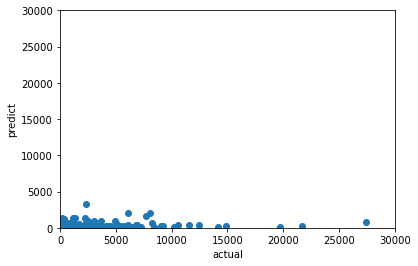

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(train['likes'],lgbm.oof);
plt.xlim(0,30000);
plt.ylim(0,30000);
plt.xlabel('actual');
plt.ylabel('predict');

In [52]:
os.makedirs(f"{OUTPUT_DIR}/imp", exist_ok=True)
feature_importance_df[order[:50]].to_csv(f"{OUTPUT_DIR}/imp/importance.csv")
display(feature_importance_df[order[:50]])

,ObjectCollection_paintings,ObjectCollection_prints,subtitle_h,Materials_oil paint (paint),principal_maker,principal_or_first_maker,principal_or_first_maker_target_enc,principal_maker_target_enc,date_of_birth,area,...,LongTitleEmb_pca_110,LongTitleEmb_pca_12,StringLength__sub_title,LongTitleEmb_pca_168,DescriptionEmb_pca_40,LongTitleEmb_pca_15,subtitle_d,CE_dating_sorting_date,LongTitleEmb_pca_216,LongTitleEmb_pca_243
fold_0,410648.782079,64037.277448,24081.260014,31963.425468,31736.191384,18797.767220,22039.786564,17781.376221,10286.456141,5777.933292,...,1836.213294,2504.604976,2581.834395,1500.577525,1182.087373,2104.884870,1066.712414,1356.475505,1228.353182,950.621720
fold_1,410074.250956,66027.181335,30340.560117,28624.039782,29918.354162,22626.274145,21028.555906,18841.682898,9897.256838,9379.989174,...,1531.116404,3121.154521,1700.992318,1205.244422,1871.607428,1756.914120,1705.789623,1074.489189,1365.820012,1079.616460
fold_2,409392.375515,66736.802990,30470.824509,28875.062490,28492.756005,25361.931724,20445.242265,19315.200065,10977.513199,5562.666990,...,2039.339896,2267.500708,2439.890569,1041.701910,1216.941998,1574.170325,1479.332267,1835.319439,1763.616422,1110.058162
fold_3,425125.099571,69668.189889,21073.958568,28941.197052,33500.447914,25362.073743,17957.451142,15725.007856,9718.730045,5387.518991,...,1388.607358,1834.878333,1554.474756,1257.296840,3005.677550,1518.840408,1312.700096,1117.051420,1606.485450,1109.930421
fold_4,398272.677604,64393.776222,37177.981410,31266.711475,29633.701146,23436.691136,18705.262826,17747.943828,13027.480695,8407.502479,...,1994.032740,1981.907793,1951.882675,1921.275534,1902.108368,1872.950404,1865.931148,1800.531786,1799.952446,1799.926604


In [53]:
from make_data import make_oof
oof_df = make_oof(OUTPUT_DIR=OUTPUT_DIR, TARGET=cfg['target'])

In [54]:
# from score import calc_macro_auc
# score = calc_macro_auc(train_target_df=train_target_df, oof_df=oof_df, order_list=TARGET_IDS)

In [55]:
sample_sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')

In [56]:
from make_data import make_sub
sub_df = make_sub(sample_sub=sample_sub, TARGET_NAME=cfg['target'], TRIAL_NAME=TRIAL_NAME, OUTPUT_DIR=OUTPUT_DIR, cv_score=lgbm.score)

QUick Sub
sh sub.sh output/20210309001538_21_add_gotosan2_new_feature/pred/pred_likes_1.0189.csv


In [57]:
sub_df.describe()

,likes
count,12008.000000
mean,22.353934
std,66.570329
min,0.000000
25%,1.164592
50%,2.683111
75%,6.635253
max,1951.617272


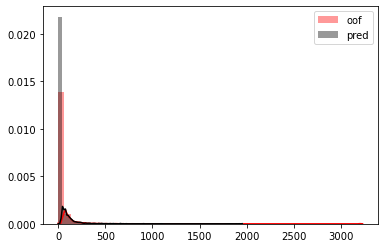

In [58]:
from make_fig import make_dist_oof_pred
make_dist_oof_pred(oof_df=oof_df,sub_df=sub_df,OUTPUT_DIR=OUTPUT_DIR)